<a href="https://colab.research.google.com/github/KarthisonR/houseprice-prediction/blob/main/maybe_a_house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/kc_house_data.csv")

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()
df['bathrooms'] = df['bathrooms'].astype(int)
df['floors'] = df['floors'].astype(int)

In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop(columns="id",axis=1,inplace=True)
df.drop(columns="date",axis=1,inplace=True)

Text(0.5, 1.0, 'area of living vs Price')

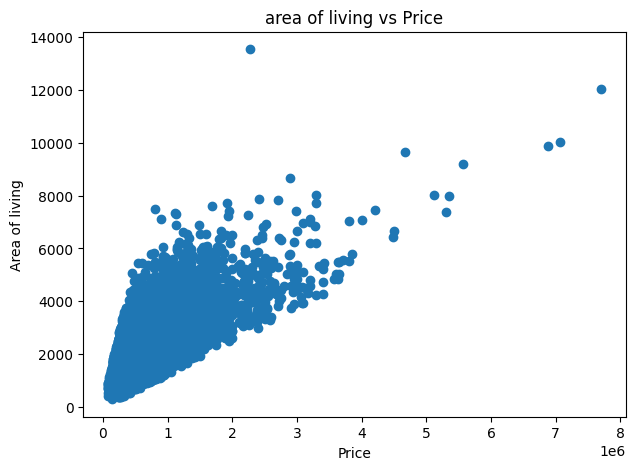

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df.price,df.sqft_living)
plt.ylabel('Area of living')
#plt.ylabel('price')
plt.xlabel("Price")
plt.title('area of living vs Price')

Text(0.5, 1.0, 'area of lot vs Price')

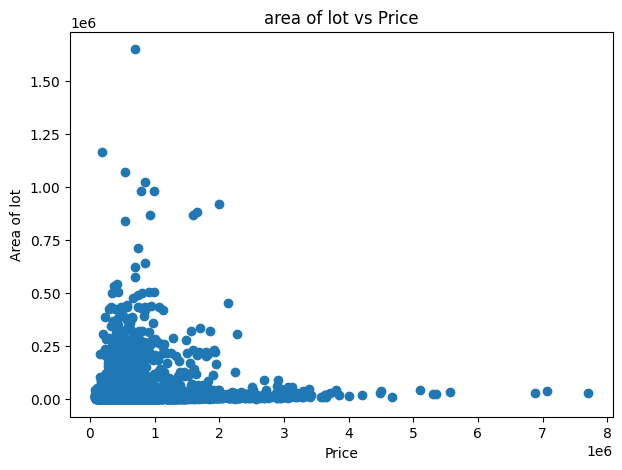

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df.price,df.sqft_lot)
plt.ylabel('Area of lot')
#plt.ylabel('price')
plt.xlabel("Price")
plt.title('area of lot vs Price')

Text(0.5, 1.0, 'area of above vs Price')

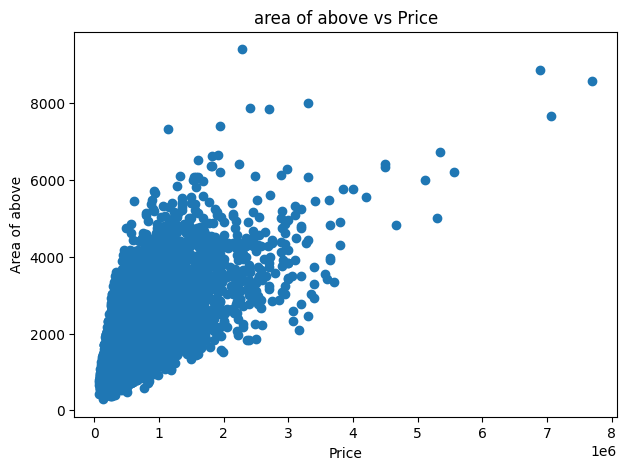

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df.price,df.sqft_above)
plt.ylabel('Area of above')
#plt.ylabel('price')
plt.xlabel("Price")
plt.title('area of above vs Price')

Text(0.5, 1.0, 'area of basement vs Price')

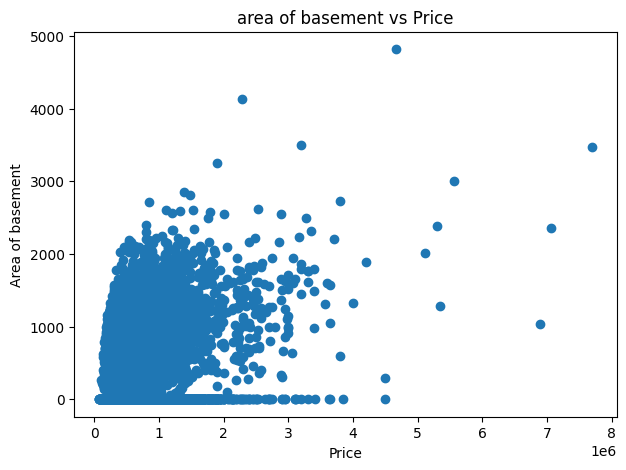

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df.price,df.sqft_basement)
plt.ylabel('Area of basement')
#plt.ylabel('price')
plt.xlabel("Price")
plt.title('area of basement vs Price')

<Axes: >

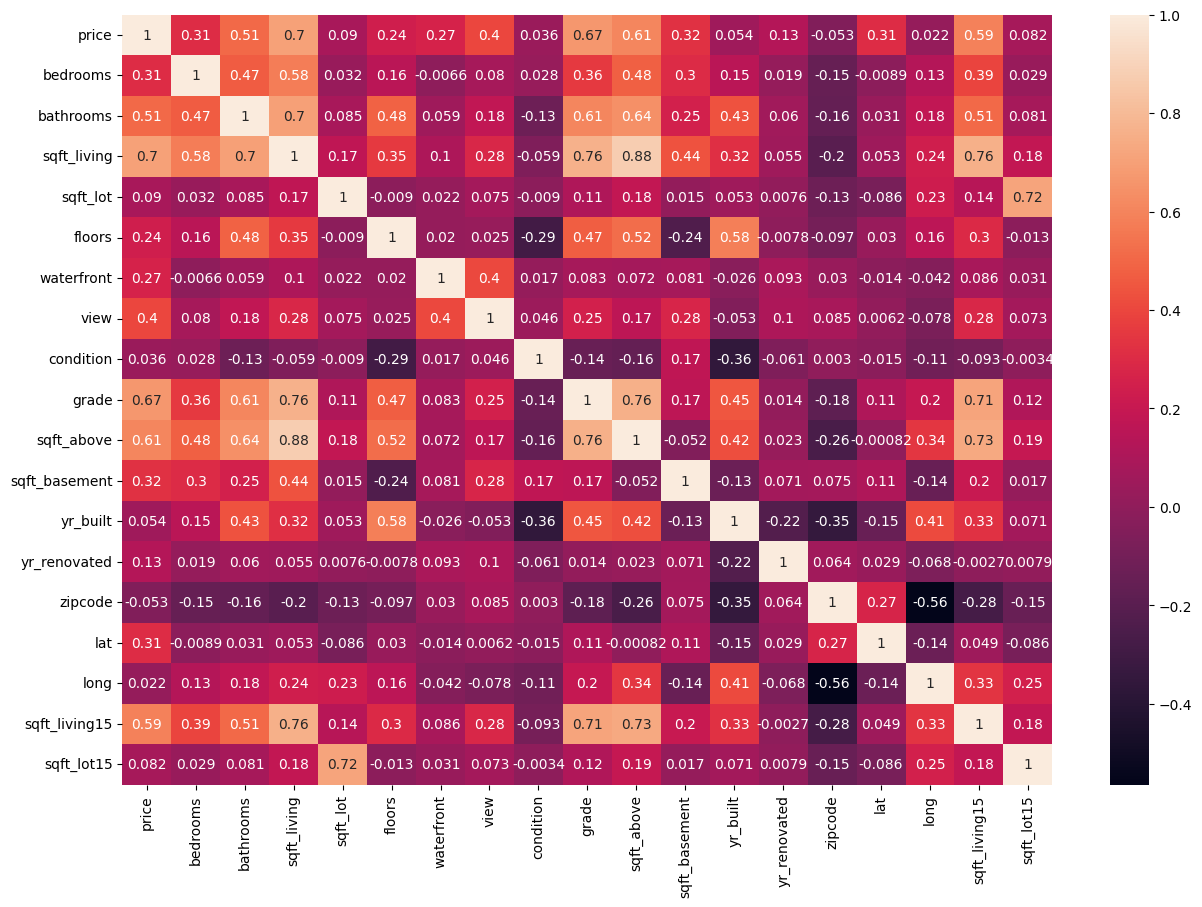

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.corr()["price"].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.237211
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.510072
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
model=LinearRegression()
X=df.drop(columns=["price",'floors','bathrooms'],axis=1,)#"long",'condition','yr_built','sqft_lot15','sqft_lot','yr_renovated'
y=df["price"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_predict=model.predict(x_test)

In [ ]:
score = r2_score(y_test,y_predict)
print(f"the predicted score of this model is:{score*100}")

the predicted score of this model is:70.04714659497802
